<a href="https://colab.research.google.com/github/iguv221/Tobigs_Assignment/blob/main/4%EC%A3%BC%EC%B0%A8_DR2_%EA%B9%80%EC%84%B1%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [32]:
mnist = io.loadmat('/content/drive/MyDrive/ToBigs/과제 폴더/4주차/Week4_Dimension_Reduction/Week4_Dimension_Reduction/Assignment/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [33]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [34]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [36]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

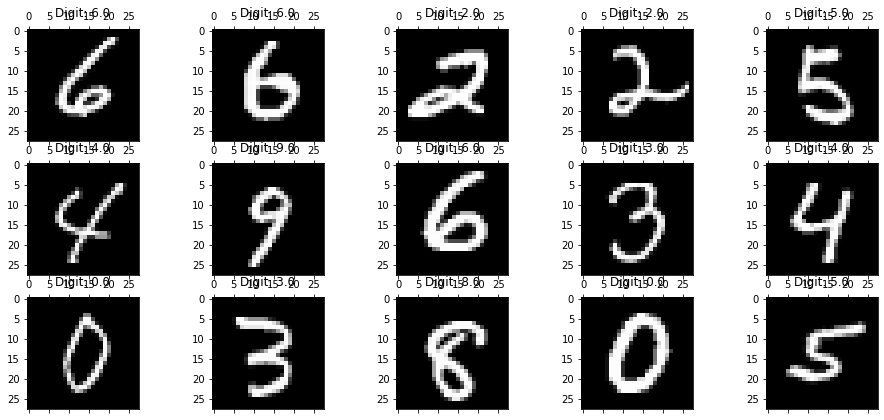

In [47]:
# 데이터 형태 시각화
rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [39]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

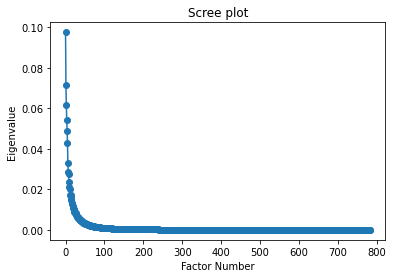

In [41]:
# Scree plot 그려보기
exp_var_ratio = pca.explained_variance_ratio_
plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

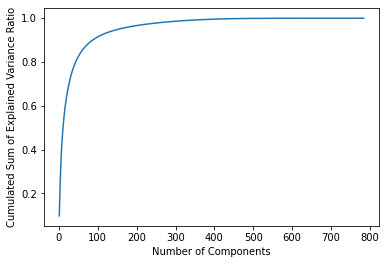

[0.09756781 0.1691828  0.23060795 0.2847571  0.33365672 0.37664598
 0.40949477 0.43832243 0.46589306 0.48939944 0.51043532 0.530712
 0.54776875 0.56477768 0.58057101 0.59543698 0.60866842 0.62146366
 0.6333421  0.64479563 0.6554773  0.6655575  0.67513526 0.68422141
 0.69304315 0.70143391 0.70955274 0.7174359  0.72481571 0.73173172
 0.73829721 0.74474888 0.75077736 0.75661833 0.76229332 0.76771555
 0.77276549 0.77761992 0.78240539 0.78708188 0.79163739 0.79608277
 0.80026749 0.80422848 0.80806946 0.81181543 0.81543894 0.81893013
 0.82230821 0.82551781 0.82869503 0.83179701 0.83475554 0.83763675
 0.84045193 0.84314899 0.84582646 0.84839593 0.85092513 0.85337146
 0.85578853 0.85817242 0.86045251 0.86265616 0.86479099 0.8668564
 0.86888365 0.87083728 0.87274918 0.87463266 0.87649848 0.87830305
 0.88006666 0.88180566 0.88345411 0.88508202 0.88669903 0.88823836
 0.8897139  0.89113574 0.89254253 0.89394098 0.89533499 0.89668764
 0.89801459 0.89933319 0.90061743 0.90186761 0.90308999 0.9042953

In [42]:
# 누적 설명 비중(Cumulated Sum of Explained Variance Ratio) 그래프 그려보기

exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)     # 누적 설명 비중

# 주성분 개수에 대응하는 누적 설명 비중을 확인하는 것이 목적이므로, X축에는 index에 1을 더한 값을 배치('개수'를 뜻함)
plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [44]:
import time 
from sklearn.ensemble import RandomForestClassifier
import xgboost    
from sklearn.metrics import accuracy_score    

In [50]:
RF = RandomForestClassifier()
start = time.time()     # 시작 시간
RF.fit(X_train, np.ravel(y_train))     # 원본 데이터 Training
end = time.time()     # 완료 시간
elapse_time = end - start     # 경과 시간

print("Random Forest Training Time : {} seconds".format(round(elapse_time,5)))
print("Test Accuracy : {} ".format(round(accuracy_score(y_test, RF.predict(X_test)),5)))

Random Forest Training Time : 35.8158 seconds
Test Accuracy : 0.96943 


In [52]:
# XGB 가 엄청 오래 걸립니다... 거의 10분 좀 넘게 걸립니다.
XGB = xgboost.XGBClassifier()
start = time.time()     # 시작 시간
XGB.fit(X_train, np.ravel(y_train))     # 원본 데이터 Training
end = time.time()     # 완료 시간
elapse_time = end - start     # 경과 시간

print("Random Forest Training Time : {} seconds".format(round(elapse_time,5)))
print("Test Accuracy : {} ".format(round(accuracy_score(y_test, XGB.predict(X_test)),5)))

Random Forest Training Time : 656.80134 seconds
Test Accuracy : 0.93536 


특정한 틀 없이 자유롭게 해주시면 됩니다!